In [1]:
# importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# reading datasets
purchase_behavior_df = pd.read_csv('quantinum _purchase_behavior.csv')
transaction_data_df = pd.read_excel('quantinum _transaction_data.xlsx')

In [3]:
# copying purchase behavior datasets for analysis
pbdf = purchase_behavior_df.copy()

In [4]:
pbdf.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
#checking shapes
pbdf.shape

(72637, 3)

In [6]:
pbdf.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [7]:
pbdf.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [8]:
pbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
#checking for null values
print("Null values is each columns:")
pbdf.isnull().sum()

Null values is each columns:


LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [10]:
#checking for duplicate value
print(f'Total number of Duplicate rows::{pbdf.duplicated().sum()}')

Total number of Duplicate rows::0


In [11]:
pbdf.describe().T

,count,mean,std,min,25%,50%,75%,max
LYLTY_CARD_NBR,72637.0,136185.93177,89892.932014,1000.0,66202.0,134040.0,203375.0,2373711.0


In [12]:
customer_lifestage = pbdf['LIFESTAGE'].value_counts()
customer_lifestage

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

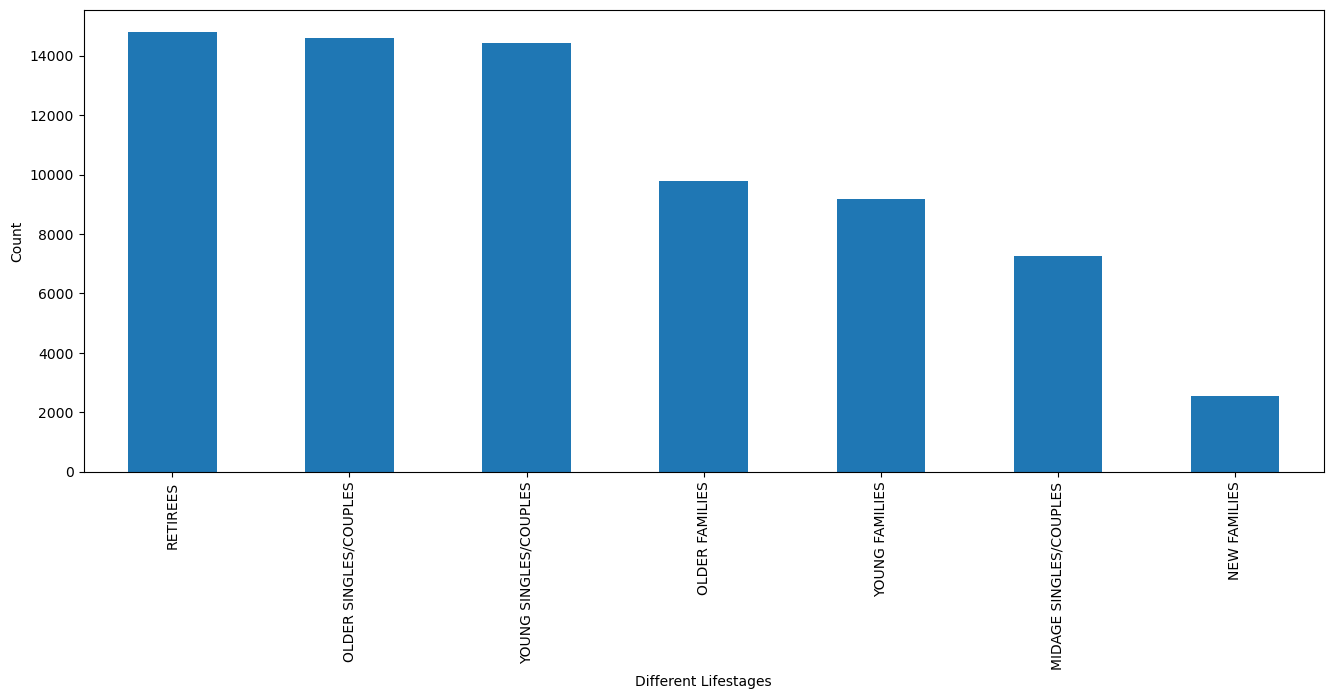

In [13]:
plt.figure(figsize = (16,6))
bars = customer_lifestage.plot(kind = 'bar')
plt.xlabel('Different Lifestages')
plt.ylabel('Count')
plt.show()

In [14]:
customer_type = pbdf['PREMIUM_CUSTOMER'].value_counts()
customer_type

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

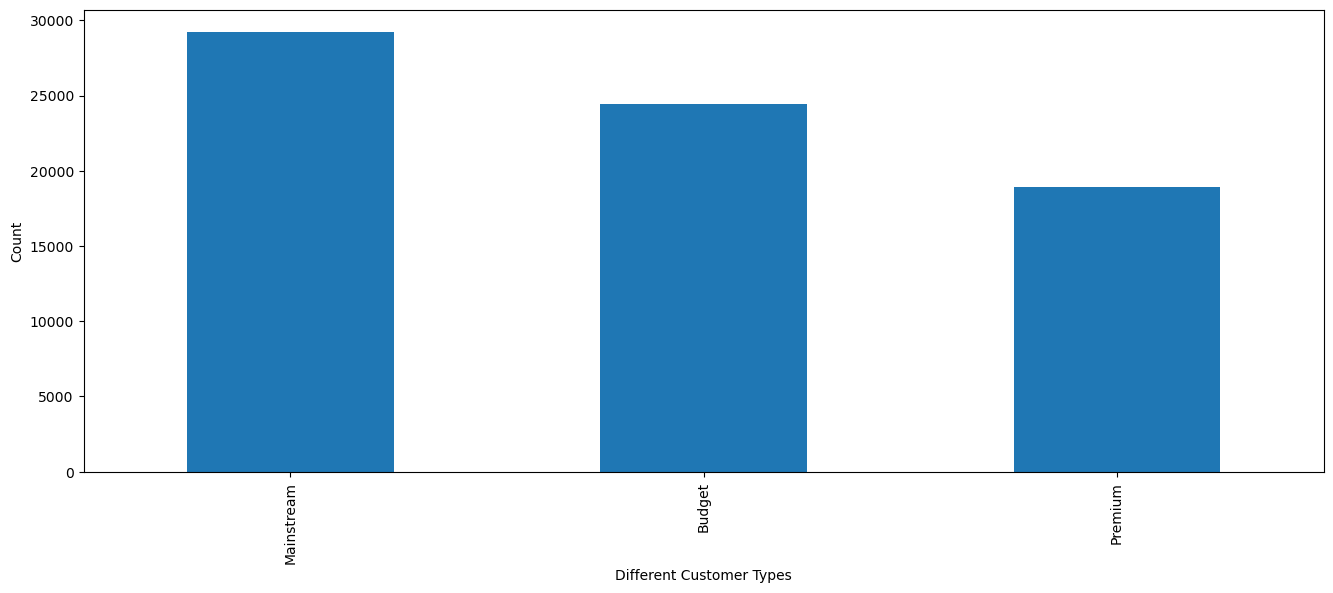

In [15]:
plt.figure(figsize = (16,6))
bars = customer_type.plot(kind = 'bar')
plt.xlabel('Different Customer Types')
plt.ylabel('Count')
plt.show()

<Axes: >

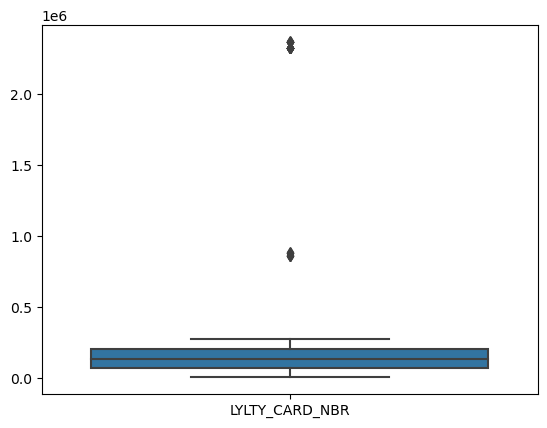

In [16]:
# checking for outliers
sns.boxplot(data = pbdf)

Since colum 'LYLTY_CARD_NBR' is just a card number and won't affect the analysis no need for removing outliers

In [17]:
pbdf['LYLTY_CARD_NBR'].min()

1000

In [18]:
pbdf['LYLTY_CARD_NBR'].max()

2373711

# Transaction analysis


In [19]:
#copying transaction_data_df 
tdf = transaction_data_df.copy()

In [20]:
tdf.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [21]:
tdf.shape

(264836, 8)

In [22]:
# checking for null value
tdf.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [23]:
#checking for duplicate rows
tdf.duplicated().sum()
print(f'Total number of Duplicate rows::{tdf.duplicated().sum()}')

Total number of Duplicate rows::1


In [24]:
#removing duplicate value
tdf.drop_duplicates(inplace = True)
print(f'Total number of Duplicate rows::{tdf.duplicated().sum()}')

Total number of Duplicate rows::0


In [25]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264835 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264835 non-null  int64  
 1   STORE_NBR       264835 non-null  int64  
 2   LYLTY_CARD_NBR  264835 non-null  int64  
 3   TXN_ID          264835 non-null  int64  
 4   PROD_NBR        264835 non-null  int64  
 5   PROD_NAME       264835 non-null  object 
 6   PROD_QTY        264835 non-null  int64  
 7   TOT_SALES       264835 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 18.2+ MB


In [26]:
#tdf['DATE'] = pd.to_datetime(tdf['DATE'],unit='D')

In [27]:
base_date = pd.Timestamp('1899-12-30')
tdf['DATE'] = base_date + pd.to_timedelta(tdf['DATE'], unit='D')
tdf['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264835, dtype: datetime64[ns]

In [28]:
tdf.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [29]:
tdf.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE,264835,2018-12-30 00:52:42.252722944,2018-07-01 00:00:00,2018-09-30 00:00:00,2018-12-30 00:00:00,2019-03-31 00:00:00,2019-06-30 00:00:00,NaN
STORE_NBR,264835.0,135.080216,1.0,70.0,130.0,203.0,272.0,76.784306
LYLTY_CARD_NBR,264835.0,135549.584115,1000.0,70021.0,130358.0,203094.5,2373711.0,80580.11109
TXN_ID,264835.0,135158.411619,1.0,67601.0,135138.0,202701.5,2415841.0,78133.156318
PROD_NBR,264835.0,56.583201,1.0,28.0,56.0,85.0,114.0,32.826692
PROD_QTY,264835.0,1.907308,1.0,2.0,2.0,2.0,200.0,0.643655
TOT_SALES,264835.0,7.304205,1.5,5.4,7.4,9.2,650.0,3.083231


In [30]:
ndf = tdf.select_dtypes(['int64','float64'])
ndf

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,1,1000,1,5,2,6.0
1,1,1307,348,66,3,6.3
2,1,1343,383,61,2,2.9
3,2,2373,974,69,5,15.0
4,2,2426,1038,108,3,13.8
...,...,...,...,...,...,...
264831,272,272319,270088,89,2,10.8
264832,272,272358,270154,74,1,4.4
264833,272,272379,270187,51,2,8.8
264834,272,272379,270188,42,2,7.8


<Axes: >

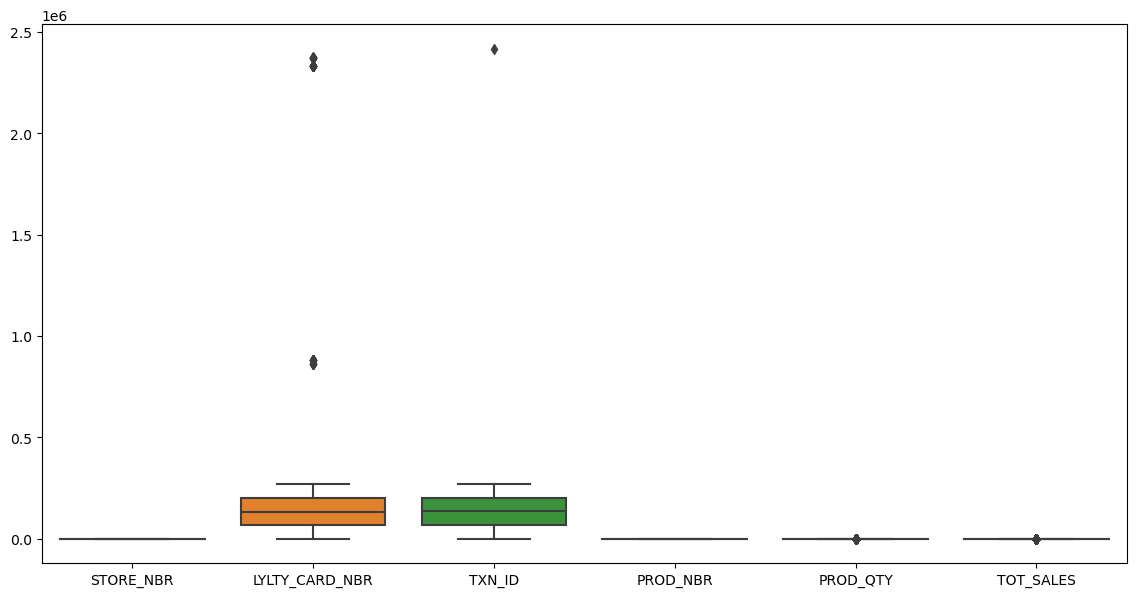

In [31]:
plt.figure(figsize = (14,7))
sns.boxplot(ndf)

In [32]:
def clear_outliers(df):
    for col in df.select_dtypes(include = ['int64','float64']).columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR = Q3 - Q1 #inter-quartile range
        
        lb = Q1 - 1.5 * IQR # lower bound
        ub = Q3 + 1.5 * IQR # upper bound
        
        df[col] = df[col].apply(lambda x: lb if x < lb else (ub if x > ub else x))
    return df

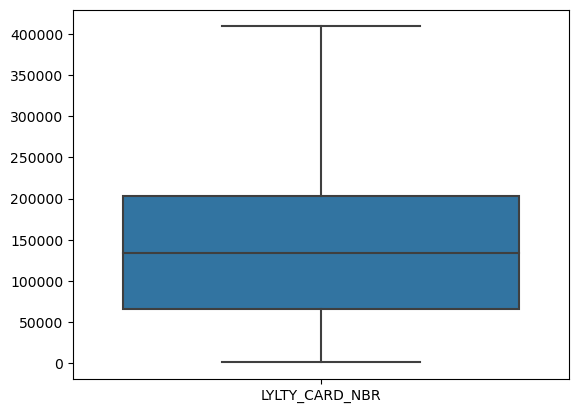

In [33]:
cleared_pbdf = clear_outliers(pbdf)
sns.boxplot(data = cleared_pbdf)
pbdf = cleared_pbdf

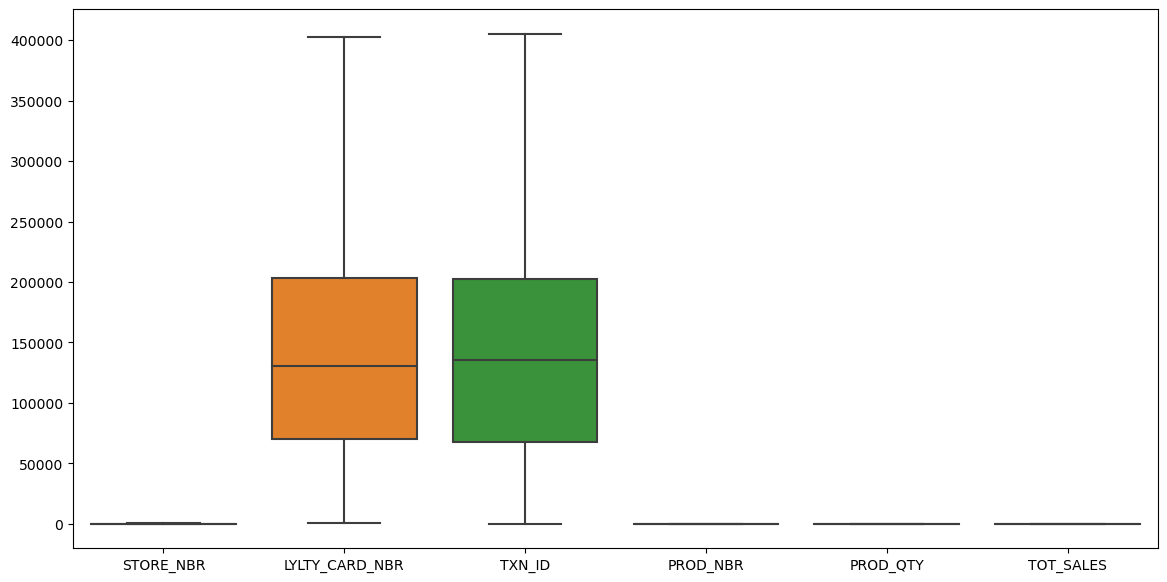

In [34]:
cleared_tdf = clear_outliers(tdf)
plt.figure(figsize = (14,7))
sns.boxplot(data = cleared_tdf)
tdf = cleared_tdf

Since colum 'LYLTY_CARD_NBR' and 'TXN_ID is just a card number and transactionID and won't affect the analysis no need for removing outliers

In [35]:
tdf['PROD_NAME'].value_counts()

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

In [36]:
def clean_product_name(product):
    # Remove extra spaces
    product = re.sub(r'\s+', ' ', product).strip()
    
    # Extract weight if present (e.g., "135g" or "135 g")
    weight_match = re.search(r'(\d+\s?[a-zA-Z]+)', product)
    weight = weight_match.group(1) if weight_match else ''
    
    # Remove the weight from the product name
    if weight:
        product = product.replace(weight, '').strip()
    
    # Standardize weight formatting (e.g., "135g" -> "135 g")
    weight = re.sub(r'(\d+)([a-zA-Z])', r'\1 \2', weight)
    
    # Expand abbreviations and clean up terms
    product = product.replace('S/Cream', 'Sour Cream') \
                     .replace('&', 'and') \
                     .replace('Chckn', 'Chicken') \
                     .replace('Chps', 'Chips') \
                     .replace('Hny', 'Honey') \
                     .replace('Jlpno', 'Jalapeno') \
                     .replace('Sr', 'Sour') \
                     .replace('Slt', 'Salt') \
                     .replace('Vingar', 'Vinegar') \
                     .replace('Orgnl', 'Original') \
                     .replace('Cn', 'Corn') \
                     .replace('Chtny', 'Chutney') \
                     .replace('Compny', 'Company') \
                     .replace('Creamandchives', 'Cream and chives') \
                     .replace('Hony', 'Honey')
    # Title case the product name
    product = product.lower()
    if weight:
       product = f"{product} {weight}"
    
    return product 

# Clean the list of products
cleaned_products = [clean_product_name(product) for product in tdf['PROD_NAME']]
#cleaned_products



In [37]:
def clean_and_separate(items):
    cleaned_data = []
    for item in items:
        # Regex to separate size (e.g., 175g, 300g, etc.)
        match = re.search(r'(\d+\s?[gG])$', item)
        if match:
            size = match.group(0).strip()
            name =  re.sub(r'\s*\d+\s?[gG]', '', item).strip()
        else:
            name = item.strip()
            size = None
        cleaned_data.append({'Name': name, 'Size': size})
    return cleaned_data

# Process the list
cleaned_list = clean_and_separate(cleaned_products)
#cleaned_list

In [38]:
names = [item['Name'] for item in cleaned_list]  # List comprehension to extract names
tdf['PROD_NAME'] = names
#tdf['PROD_NAME'].unique()

In [39]:
sizes = [item['Size'] for item in cleaned_list]  # List comprehension to extract size
tdf['PROD_SIZE'] = sizes
tdf['PROD_SIZE'].isnull().sum()

0

In [40]:
# Function to extract brand names

def extract_brand(product):
    if not isinstance(product, str) or not product.strip():
        # Handle empty or non-string cases
        return 'Unknown'
    
    words = product.split()
    if len(words) > 1:
        if words[0] in ['natural', 'red']:
            return ' '.join(words[:2])
        else:
            return words[0]
    return words[0] if words else 'Unknown'

# Apply the function to the 'PROD_NAME' column
brand_names = tdf['PROD_NAME'].apply(extract_brand)

# Display the extracted brand names
#print(brand_names)

In [41]:
tdf['BRANDS'] = tdf['PROD_NAME'].apply(extract_brand)
tdf['BRANDS'] = tdf['BRANDS'].replace({
    'grain' : 'grain waves',
    'grnwves' : 'grain waves',
    'dorito' : 'doritos',
    'old' : 'old el paso',
    'natural chipco' : 'natural chip co',
    'natural chip' : 'natural chip co',
    'infzns' : 'infuzions',
    'ww' : 'woolworths',
    'snbts' : 'sunbites',
    'smith' : 'smiths',
    'red rock' : 'red rock deli',
    'rrd' : 'red rock deli',
    'burger' : 'burger kings',
    'french' : 'french fries'
})
#tdf['BRANDS'].unique()

In [42]:
tdf

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRANDS
0,2018-10-17,1,1000.0,1.0,5,natural chip company seasalt,2.0,6.0,175 g,natural chip co
1,2019-05-14,1,1307.0,348.0,66,ccs nacho cheese,2.0,6.3,175 g,ccs
2,2019-05-20,1,1343.0,383.0,61,smiths crinkle cut chips chicken,2.0,2.9,170 g,smiths
3,2018-08-17,2,2373.0,974.0,69,smiths chip thinly sour creamandonion,2.0,14.9,175 g,smiths
4,2018-08-18,2,2426.0,1038.0,108,kettle tortilla chipshoneyandjalapeno chili,2.0,13.8,150 g,kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319.0,270088.0,89,kettle sweet chilli and sour cream,2.0,10.8,175 g,kettle
264832,2018-08-13,272,272358.0,270154.0,74,tostitos splash of lime,2.0,4.4,175 g,tostitos
264833,2018-11-06,272,272379.0,270187.0,51,doritos mexicana,2.0,8.8,170 g,doritos
264834,2018-12-27,272,272379.0,270188.0,42,doritos corn chip mexican jalapeno,2.0,7.8,150 g,doritos


In [43]:
purchase_behavior_df = pbdf
transaction_data_df = tdf

In [44]:
from pandasql import sqldf

In [45]:
sqldf('\
      select STORE_NBR, count(PROD_NAME)\
      from tdf\
      group by 1;\
      ')

,STORE_NBR,count(PROD_NAME)
0,1,573
1,2,506
2,3,1502
3,4,1678
4,5,1361
...,...,...
267,268,546
268,269,1607
269,270,1630
270,271,1385


In [46]:
tdf.groupby('STORE_NBR')['PROD_NAME'].agg('count')

STORE_NBR
1       573
2       506
3      1502
4      1678
5      1361
       ... 
268     546
269    1607
270    1630
271    1385
272     563
Name: PROD_NAME, Length: 272, dtype: int64

In [47]:
# total sales per store number
tdf.groupby('STORE_NBR')['TOT_SALES'].agg('sum')

STORE_NBR
1       2393.60
2       2005.70
3      12802.45
4      14644.85
5       9489.70
         ...   
268     2588.65
269    11198.20
270    11276.45
271     9721.80
272     4647.25
Name: TOT_SALES, Length: 272, dtype: float64

In [48]:
# total transactions per store number
transactions_per_store_number = tdf.groupby('STORE_NBR')['TXN_ID'].agg('count').sort_values(ascending = False)
print(' Top 3 Most transaction Store Number::')
print(transactions_per_store_number.head(3))
print('\n\n')
print('Store with least Transaction::')
low_trans = transactions_per_store_number.to_frame(name='transactions')
print(low_trans.query('transactions < 50'))

 Top 3 Most transaction Store Number::
STORE_NBR
226    2022
88     1873
93     1832
Name: TXN_ID, dtype: int64



Store with least Transaction::
           transactions
STORE_NBR              
258                  47
198                  47
117                  46
85                    3
193                   3
252                   2
31                    2
211                   2
206                   2
11                    2
92                    1
76                    1


In [49]:
# total sales per prod_name
total_sales_per_prod_name = tdf.groupby('PROD_NAME')['TOT_SALES'].agg('sum').sort_values(ascending = False)
print(' Top 5 product name per total sale::')
print(total_sales_per_prod_name.head(5))
print('\n\n')
print('Bottom 5 product name per total sale::')
print(total_sales_per_prod_name.tail(5))

 Top 5 product name per total sale::
PROD_NAME
dorito corn chp supreme                  39067.75
smiths crnkle chip original big bag      36205.40
smiths crinkle chips salt and vinegar    34719.50
kettle mozzarella basil and pesto        34291.20
smiths crinkle original                  34219.20
Name: TOT_SALES, dtype: float64



 Bottom 5 product name per total sale::
PROD_NAME
ww crinkle cut chicken               4702.2
sunbites whlegrn crisps frch/onin    4600.2
ww crinkle cut original              4532.2
woolworths mild salsa                4234.5
woolworths medium salsa              4050.0
Name: TOT_SALES, dtype: float64


In [50]:
#merging transaction_data_df & purchase_behavior_df dataset
merge_data = pd.merge(transaction_data_df, purchase_behavior_df, on='LYLTY_CARD_NBR', how = 'left')
merge_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRANDS,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000.0,1.0,5,natural chip company seasalt,2.0,6.0,175 g,natural chip co,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307.0,348.0,66,ccs nacho cheese,2.0,6.3,175 g,ccs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343.0,383.0,61,smiths crinkle cut chips chicken,2.0,2.9,170 g,smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373.0,974.0,69,smiths chip thinly sour creamandonion,2.0,14.9,175 g,smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426.0,1038.0,108,kettle tortilla chipshoneyandjalapeno chili,2.0,13.8,150 g,kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2019-03-09,272,272319.0,270088.0,89,kettle sweet chilli and sour cream,2.0,10.8,175 g,kettle,YOUNG SINGLES/COUPLES,Premium
264831,2018-08-13,272,272358.0,270154.0,74,tostitos splash of lime,2.0,4.4,175 g,tostitos,YOUNG SINGLES/COUPLES,Premium
264832,2018-11-06,272,272379.0,270187.0,51,doritos mexicana,2.0,8.8,170 g,doritos,YOUNG SINGLES/COUPLES,Premium
264833,2018-12-27,272,272379.0,270188.0,42,doritos corn chip mexican jalapeno,2.0,7.8,150 g,doritos,YOUNG SINGLES/COUPLES,Premium


In [51]:
transaction_data_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRANDS
0,2018-10-17,1,1000.0,1.0,5,natural chip company seasalt,2.0,6.0,175 g,natural chip co
1,2019-05-14,1,1307.0,348.0,66,ccs nacho cheese,2.0,6.3,175 g,ccs
2,2019-05-20,1,1343.0,383.0,61,smiths crinkle cut chips chicken,2.0,2.9,170 g,smiths
3,2018-08-17,2,2373.0,974.0,69,smiths chip thinly sour creamandonion,2.0,14.9,175 g,smiths
4,2018-08-18,2,2426.0,1038.0,108,kettle tortilla chipshoneyandjalapeno chili,2.0,13.8,150 g,kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319.0,270088.0,89,kettle sweet chilli and sour cream,2.0,10.8,175 g,kettle
264832,2018-08-13,272,272358.0,270154.0,74,tostitos splash of lime,2.0,4.4,175 g,tostitos
264833,2018-11-06,272,272379.0,270187.0,51,doritos mexicana,2.0,8.8,170 g,doritos
264834,2018-12-27,272,272379.0,270188.0,42,doritos corn chip mexican jalapeno,2.0,7.8,150 g,doritos


In [52]:
transaction_data_df['TXN_ID'].sort_values(ascending= False)

15726     405352.25
25110     270209.00
25109     270208.00
25108     270207.00
25107     270206.00
            ...    
99838          5.00
185543         4.00
185542         3.00
238495         2.00
0              1.00
Name: TXN_ID, Length: 264835, dtype: float64

In [53]:
transaction_data_df.to_csv('final_QP1.csv')

In [54]:
merge_data.to_csv('finmergedata.csv')